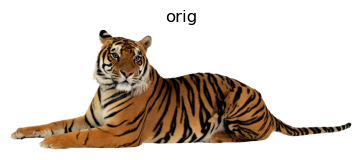

In [5]:
#1/1

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open("image.png").convert("RGB")
image = np.array(image)

R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]




plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("orig")
plt.axis('off')

plt.show()



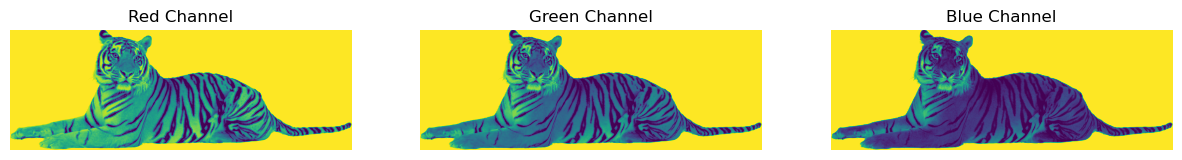

In [3]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(R)
plt.title("Red Channel")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(G)
plt.title("Green Channel")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(B)
plt.title("Blue Channel")
plt.axis('off')

plt.show()

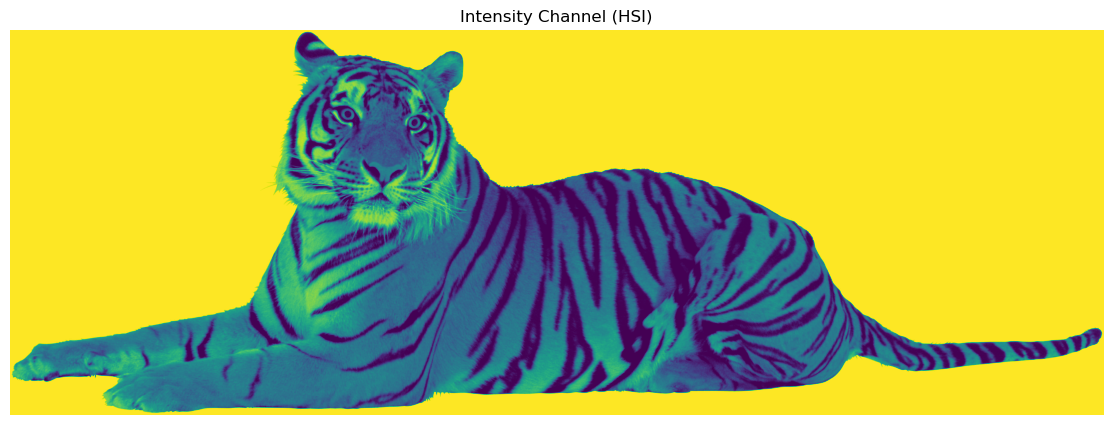

In [5]:
#1/2

def rgb_to_hsi(image):
    R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    R, G, B = R / 255.0, G / 255.0, B / 255.0

    # Intensity
    I = (R + G + B) / 3.0

    # Saturation
    min_RGB = np.minimum(np.minimum(R, G), B)
    S = 1 - 3 * min_RGB / (R + G + B + 1e-6)

    # Hue
    numerator = 0.5 * ((R - G) + (R - B))
    denominator = np.sqrt((R - G)**2 + (R - B) * (G - B))
    H = np.arccos(numerator / (denominator + 1e-6))
    H[B > G] = 2 * np.pi - H[B > G]
    H = H / (2 * np.pi)

    return np.dstack((H, S, I))

hsi_image = rgb_to_hsi(image)
I = hsi_image[:, :, 2]

plt.figure(figsize=(15, 5))
plt.imshow(I)
plt.title("Intensity Channel (HSI)")
plt.axis('off')
plt.show()


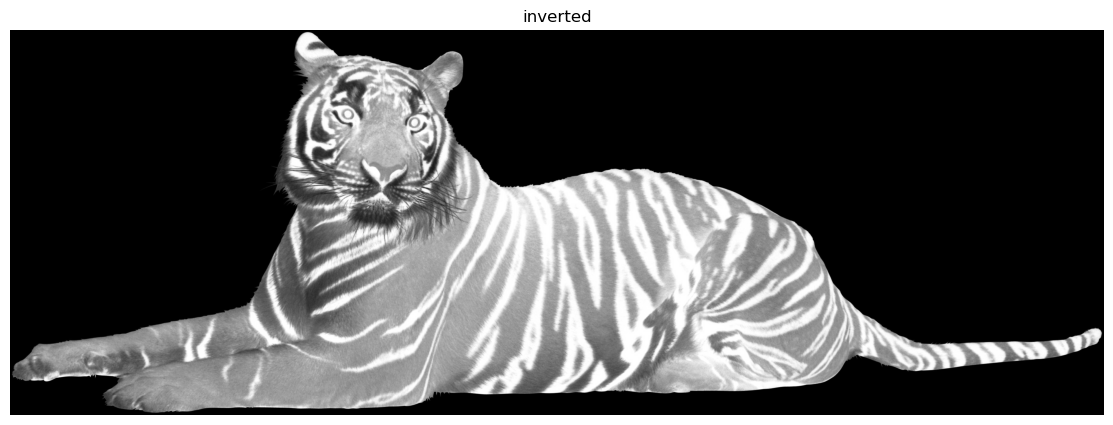

In [7]:
#1/3

I = (R.astype(float) + G.astype(float) + B.astype(float)) / 3
I = I.astype(np.uint8) 

I_inverted = 255 - I
inverted_image = np.stack([I_inverted] * 3, axis=-1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 1, 1)
plt.imshow(inverted_image)
plt.title("inverted")
plt.axis('off')

plt.show()

In [9]:
image1 = Image.open("image1.png").convert("RGB")
image1 = np.array(image1)

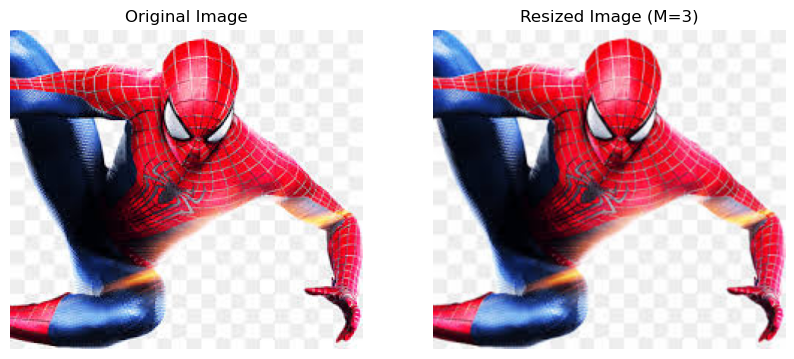

In [11]:

#2/1
# bilinear interpolation

def resize_image(image, scale_factor):
    h, w = image.shape[:2]
    new_h, new_w = int(h * scale_factor), int(w * scale_factor)
    resized_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)

    for i in range(new_h):
        for j in range(new_w):
            x = i / scale_factor
            y = j / scale_factor
            x1, y1 = int(x), int(y)
            x2, y2 = min(x1 + 1, h - 1), min(y1 + 1, w - 1)
            a, b = x - x1, y - y1
            resized_image[i, j] = (1 - a) * (1 - b) * image[x1, y1] + \
                                  a * (1 - b) * image[x2, y1] + \
                                  (1 - a) * b * image[x1, y2] + \
                                  a * b * image[x2, y2]
    return resized_image

M = 3
resized_image = resize_image(image1, M)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title(f"Resized Image (M={M})")
plt.axis('off')

plt.show()


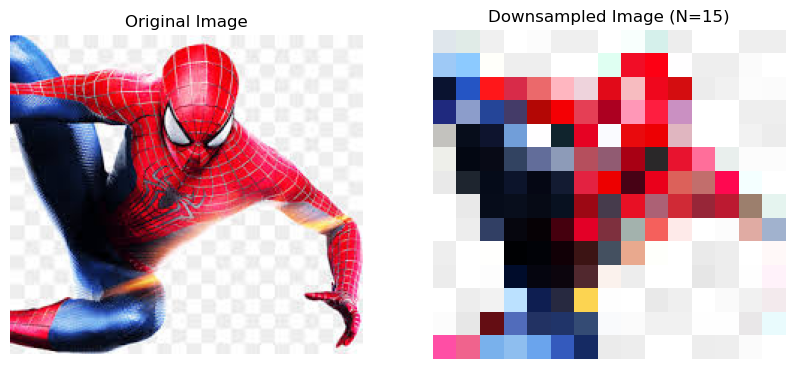

In [15]:
# 2/2

# downsampling

def downsample_image(image, scale_factor):
    h, w = image.shape[:2]
    new_h, new_w = int(h / scale_factor), int(w / scale_factor)
    downsampled_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)

    for i in range(new_h):
        for j in range(new_w):
            x = i * scale_factor
            y = j * scale_factor
            downsampled_image[i, j] = image[int(x), int(y)]
    return downsampled_image

N = 15
downsampled_image = downsample_image(image1, N)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(downsampled_image)
plt.title(f"Downsampled Image (N={N})")
plt.axis('off')

plt.show()

Image.fromarray(image1).save("orig.png")
Image.fromarray(downsampled_image).save("downsampled_image.png")

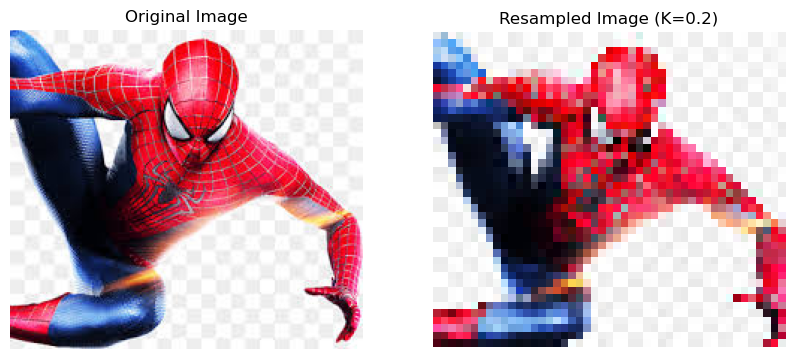

In [19]:
# 2/3 two steps

K = M / N
resized_image = resize_image(image1, M)
final_image = downsample_image(resized_image, N)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_image)
plt.title(f"Resampled Image (K={K})")
plt.axis('off')

plt.show()

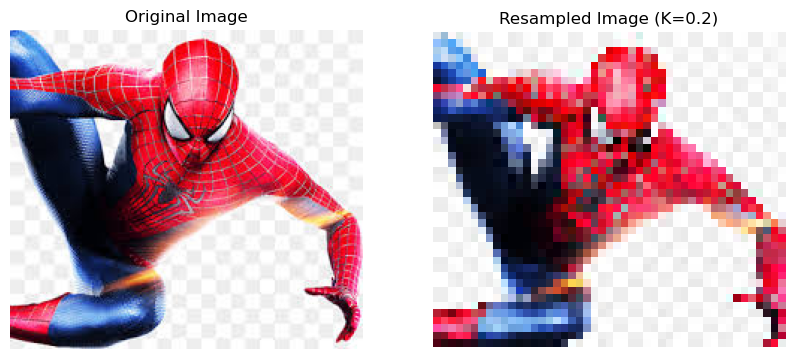

In [23]:
# 2/4 one step

final_image = resize_image(image1, K)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_image)
plt.title(f"Resampled Image (K={K})")
plt.axis('off')

plt.show()